# Introducción

El dataset utilizado en este proyecto es el **Fruits 360**, disponible en Kaggle bajo el nombre `moltean/fruits`. Este conjunto de datos contiene imágenes de varias clases de frutas, capturadas desde diferentes ángulos y en condiciones uniformes de iluminación. Este dataset es ampliamente usado para problemas de clasificación de imágenes, ya que permite entrenar modelos que pueden distinguir visualmente entre diferentes tipos de frutas.

### Características del Dataset

El dataset está compuesto por:
- **83 clases de frutas**: Algunas de las categorías incluyen manzanas, plátanos, peras, y otras frutas comunes.
- **Cantidad de imágenes por clase**: Cada clase tiene un promedio de 490 imágenes, lo que permite entrenar modelos con una diversidad visual adecuada.
- **Imágenes de tamaño estándar**: Todas las imágenes están normalizadas en tamaño, con dimensiones de 100x100 píxeles, facilitando el procesamiento y análisis en modelos de visión por computadora.
  
### Aplicaciones

Este conjunto de datos es ideal para desarrollar modelos de aprendizaje automático en tareas de clasificación de imágenes, reconocimiento de patrones visuales y aplicaciones en inteligencia artificial enfocadas en visión por computadora. La simplicidad y estructura del dataset Fruits 360 hace que sea un recurso accesible tanto para principiantes como para proyectos avanzados en el área de clasificación de imágenes.

A continuación, se explica el código desarrollado para cargar, procesar y entrenar un modelo de clasificación sobre este dataset.


# Configuración e Instalación


Este bloque de código prepara el entorno de trabajo para realizar tareas de análisis y procesamiento de datos con **Apache Spark** y configura las credenciales necesarias para descargar datasets desde **Kaggle**.

### Pasos del Código

1. **Instalación y Configuración de Spark**:
   - El código actualiza los paquetes del sistema e instala **Java** (necesario para ejecutar Spark).
   - Descarga y descomprime Spark (versión 3.5.3 con soporte para Hadoop) para permitir la manipulación de grandes conjuntos de datos de manera distribuida y eficiente.
   
2. **Instalación de Librerías**:
   - Se instalan las bibliotecas `findspark`, `pyspark`, `pillow`, y `numpy`, que son esenciales para trabajar con Spark, manipular imágenes y realizar cálculos numéricos.
   - También se instala la biblioteca `kaggle` para permitir la descarga directa de datasets desde Kaggle.

3. **Configuración de Credenciales de Kaggle**:
   - Se establece un directorio seguro para almacenar el archivo `kaggle.json` que contiene las credenciales de acceso (usuario y clave API) para la cuenta de Kaggle del usuario.
   - Las credenciales son guardadas en el archivo `kaggle.json` y se configuran los permisos de acceso para proteger la información sensible.

4. **Descarga del Dataset**:
   - El dataset `moltean/fruits` es descargado y descomprimido en el directorio `/content/fruits` para ser utilizado en el proyecto.

Este código es el paso inicial para habilitar el uso de Spark y preparar el acceso al dataset de frutas, lo que permite luego cargar, procesar y analizar los datos en un entorno distribuido.


In [ ]:
# Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz

# Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark
!pip install pillow numpy
!pip install kaggle
!pip install seaborn

# Configurar credenciales de Kaggle
import os
import json

# Crear directorio para las credenciales de Kaggle
!mkdir -p ~/.kaggle

# Crear el archivo kaggle.json con las credenciales
kaggle_token = {
    "username": "charlesvelaa",
    "key": "69fb883177f4dfa40f27dbda22bd28d5"
}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_token, file)

# Establecer permisos adecuados
!chmod 600 /root/.kaggle/kaggle.json

# Descargar el dataset
!kaggle datasets download moltean/fruits -p /content/fruits --unzip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,241 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd

# Configuración de Sesión y Ambiente

Este bloque de código configura el entorno de **Spark** para optimizar la memoria y la eficiencia en el procesamiento de datos distribuidos. Establece las variables de entorno necesarias y crea una sesión de Spark, ajustando diversos parámetros para maximizar el rendimiento.

### Pasos del Código

1. **Definición de Variables de Entorno**:
   - Las variables de entorno `JAVA_HOME` y `SPARK_HOME` especifican las ubicaciones de Java y Spark, necesarias para ejecutar Spark en este entorno.
   - La variable `PYSPARK_SUBMIT_ARGS` ajusta los límites de memoria para los procesos de Spark (16 GB para el controlador y 16 GB para los ejecutores), permitiendo el procesamiento de grandes volúmenes de datos.

2. **Inicialización de Spark**:
   - Usando la biblioteca `findspark`, el código localiza e inicia la instalación de Spark para que esté disponible en el entorno de Python. Esta configuración es crucial para conectar Spark con Python mediante PySpark.

3. **Creación de la Sesión de Spark**:
   - La sesión de Spark se crea con parámetros específicos de configuración para manejar la memoria de manera óptima, particularmente en tareas de alta demanda de recursos, como el análisis de imágenes.
   - Las configuraciones clave incluyen:
     - **Memoria del controlador y del ejecutor**: Ajustadas a 12 GB cada una para manejar grandes cantidades de datos.
     - **Tamaño máximo de resultados**: Configurado a 8 GB para soportar grandes operaciones de agregación y procesamiento.
     - **Memoria Off-Heap**: Habilitada y configurada a 8 GB para permitir el uso de memoria adicional fuera de la memoria principal de Spark.
     - **Opciones de Java**: Mejoran la eficiencia de la recolección de basura y reducen la ocupación de memoria, optimizando el rendimiento en el procesamiento de datos.

Este bloque asegura que el entorno de Spark esté configurado y listo para procesar datos de manera eficiente, particularmente en escenarios de gran demanda de memoria como el análisis de datos de imágenes.


In [ ]:
# Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--driver-memory 16g --executor-memory 16g pyspark-shell"

# Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

from pyspark.sql import SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

# Crear sesión de Spark con configuración de memoria optimizada
spark = SparkSession.builder \
    .appName("FruitsClassification") \
    .config("spark.driver.memory", "12g") \
    .config("spark.executor.memory", "12g") \
    .config("spark.driver.maxResultSize", "8g") \
    .config("spark.memory.offHeap.enabled", "true") \
    .config("spark.memory.offHeap.size", "8g") \
    .config("spark.local.dir", "/content/temp") \
    .config("spark.driver.extraJavaOptions", "-XX:+UseG1GC -XX:InitiatingHeapOccupancyPercent=70 -XX:+UseStringDeduplication") \
    .config("spark.executor.extraJavaOptions", "-XX:+UseG1GC -XX:InitiatingHeapOccupancyPercent=70 -XX:+UseStringDeduplication") \
    .getOrCreate()

# Función create_dataframes_by_chunks


Esta función tiene como objetivo procesar grandes volúmenes de datos de imágenes en fragmentos o "chunks" manejables, facilitando la creación de **DataFrames** de Spark. La función resulta fundamental para cargar imágenes, transformarlas en características que el modelo de aprendizaje automático pueda entender y almacenar las imágenes procesadas en estructuras de datos adecuadas para su análisis y entrenamiento.

### Descripción Paso a Paso

1. **Inicialización y Configuración**:
   - `chunk_dataframes`: una lista para almacenar cada **DataFrame** creado por chunk.
   - `image_paths`: una lista donde se almacenan las rutas de cada imagen junto con sus etiquetas.

2. **Recopilación de Rutas de Imágenes**:
   - Recorre el directorio raíz (`root_dir`) para identificar carpetas correspondientes a cada clase de frutas.
   - Agrega a `image_paths` cada imagen con su respectiva etiqueta, verificando extensiones para asegurar que solo se procesen formatos válidos (.jpg, .jpeg, .png).

3. **Procesamiento en Chunks**:
   - **Límite de Chunks**: Usa un límite (`max_chunks`) para evitar que se procese un volumen excesivo de imágenes en una sola ejecución, lo que podría llevar a problemas de memoria.
   - Procesa cada fragmento de imágenes (`chunk`) por separado. Cada fragmento contiene un número de imágenes especificado por `chunk_size`, lo que permite distribuir la carga de trabajo en partes pequeñas y reducir la presión sobre la memoria.
   
4. **Carga y Transformación de Imágenes**:
   - Para cada imagen en el chunk, intenta cargarla usando **Pillow** y redimensionarla a 100x100 píxeles.
   - La imagen se convierte en un array normalizado (`img_array`) y se transforma en un **DenseVector**, lo cual facilita su incorporación en un DataFrame de Spark.
   - La función controla posibles errores al abrir o procesar cada imagen, omitiendo las imágenes problemáticas y registrando el error.

5. **Creación de DataFrames de Spark**:
   - Después de procesar las imágenes en cada chunk, se crea un **DataFrame de Spark** para el chunk, asignando el esquema adecuado para que Spark pueda interpretar las características y etiquetas.
   - El DataFrame resultante se añade a la lista `chunk_dataframes`.

6. **Liberación de Memoria**:
   - Dado el gran volumen de datos y el riesgo de saturación de memoria, la función llama explícitamente a `gc.collect()` para forzar la recolección de basura y evitar problemas de memoria.

### Nota Final
La razón por la que se decidió utilizar el parámetro `max_chunks` es debido a que el poder computacional de mi entorno no era el suficiente para procesar 100,000 imágenes del dataset. Por lo tanto, decidí que lo mejor sería tomar una fracción del dataset para poder llevar a cabo la tarea de procesamiento de manera adecuada. También quiero agregar que en múltiples ocasiones tuve errores con la memoria heap de Java, justamente porque la cantidad de imágenes era tan masiva que la memoria se saturó y no me permitió finalizar el procesamiento en múltiples ocasiones.


In [ ]:
# Instalar las dependencias necesarias
!pip install torch torchvision cupy-cuda12x  # Asegúrate de que la versión de CUDA coincida con tu entorno

# Importar bibliotecas necesarias
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import DenseVector, VectorUDT
import pyspark.sql.functions as F
from pyspark.sql.types import *
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import os
import gc  # Para gestión de memoria
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Configurar transformaciones de imagen usando PyTorch
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

# Verificar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Función para procesar las imágenes en chunks y crear DataFrames directamente
def create_dataframes_by_chunks(root_dir, chunk_size=1024, max_chunks=23):
    chunk_dataframes = []
    image_paths = []

    print(f"Recolectando paths de imágenes de {root_dir}...")
    for class_folder in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                if image_file.endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(class_path, image_file)
                    image_paths.append((image_path, class_folder))

    # Procesar en chunks
    total_images = len(image_paths)
    for i in range(0, total_images, chunk_size):
        if i // chunk_size >= max_chunks:
            print("Límite de chunks alcanzado, deteniendo el procesamiento.")
            break
        chunk = image_paths[i:i + chunk_size]
        print(f"Procesando chunk {i // chunk_size + 1}/{(total_images + chunk_size - 1) // chunk_size}")

        chunk_data = []
        for path, label in chunk:
            try:
                img = Image.open(path)
                img = img.resize((100, 100))
                img_array = np.array(img) / 255.0
                features = DenseVector(img_array.flatten().tolist())
                chunk_data.append((features, label))
            except Exception as e:
                print(f"Error procesando {path}: {str(e)}")
                continue

        # Crear DataFrame del chunk si hay datos
        if chunk_data:
            schema = StructType([
                StructField("features", VectorUDT(), True),
                StructField("label", StringType(), True)
            ])
            chunk_df = spark.createDataFrame(chunk_data, schema=schema)
            chunk_dataframes.append(chunk_df)

        # Limpiar memoria
        gc.collect()

    return chunk_dataframes

Usando dispositivo: cuda


# Dataframes de entrenamiento y test

En estas líneas de código simplemente obtengo las rutas del dataset para las imágenes de **entrenamiento** y **prueba** y creo el dataframe respectivamente. Como mencioné en mi nota final del paso anterior, no seleccioné el total de chunks para entrenamiento (69) ni de train (24). Esto debido a que el poder computacional no era lo suficiente y no cuento con el equipamiento necesario (GPU Nvidia) para realizar el proceso de manera eficiente.

In [ ]:
# Crear y procesar los DataFrames de entrenamiento y prueba
print("Procesando conjunto de entrenamiento...")
training_path = "/content/fruits/fruits-360_dataset_100x100/fruits-360/Training"
training_dfs = create_dataframes_by_chunks(training_path, chunk_size=1024, max_chunks=10)

print("Procesando conjunto de prueba...")
test_path = "/content/fruits/fruits-360_dataset_100x100/fruits-360/Test"
test_dfs = create_dataframes_by_chunks(test_path, chunk_size=1024, max_chunks=2)

Procesando conjunto de entrenamiento...
Recolectando paths de imágenes de /content/fruits/fruits-360_dataset_100x100/fruits-360/Training...
Procesando chunk 1/69
Procesando chunk 2/69
Procesando chunk 3/69
Procesando chunk 4/69
Procesando chunk 5/69
Procesando chunk 6/69
Procesando chunk 7/69
Procesando chunk 8/69
Procesando chunk 9/69
Procesando chunk 10/69
Límite de chunks alcanzado, deteniendo el procesamiento.
Procesando conjunto de prueba...
Recolectando paths de imágenes de /content/fruits/fruits-360_dataset_100x100/fruits-360/Test...
Procesando chunk 1/24
Procesando chunk 2/24
Límite de chunks alcanzado, deteniendo el procesamiento.


# Unir chunks

Este código tiene como objetivo consolidar todos los DataFrames generados en chunks previamente en un único **DataFrame** para su uso en el entrenamiento y prueba del modelo. Al trabajar con grandes volúmenes de datos, dividirlos en chunks permite manejar mejor la carga computacional; sin embargo, para aplicar modelos y realizar evaluaciones, es necesario unir estos fragmentos en DataFrames completos que representen el conjunto de datos de entrenamiento (`training_df`) y el conjunto de prueba (`test_df`).

### Descripción del Código

1. **Inicialización del DataFrame de Entrenamiento**:
   - Se asigna el primer DataFrame de la lista `training_dfs` a `training_df`, sirviendo como punto de partida.
   - Luego, se recorre la lista `training_dfs` comenzando desde el segundo elemento. En cada iteración, se realiza la unión (`union`) de `training_df` con el siguiente DataFrame de la lista, acumulando así los datos de cada chunk en un solo **DataFrame de entrenamiento**.

2. **Inicialización del DataFrame de Prueba**:
   - De manera similar, el primer DataFrame de `test_dfs` se asigna a `test_df`.
   - Se recorre `test_dfs` desde el segundo elemento, y en cada iteración, se une el DataFrame actual con el siguiente en la lista, formando así un **DataFrame de prueba** completo.

### Consideraciones

Este enfoque permite procesar y almacenar datos de forma fragmentada durante la etapa de preparación, optimizando el uso de memoria y recursos computacionales. Luego, al unir los fragmentos en un solo DataFrame para entrenamiento y otro para prueba, el modelo puede trabajar con la totalidad del dataset, lo que facilita tanto el entrenamiento como la evaluación de manera integral.


In [ ]:
# Unir todos los chunks en un solo DataFrame
training_df = training_dfs[0]
for df in training_dfs[1:]:
    training_df = training_df.union(df)

test_df = test_dfs[0]
for df in test_dfs[1:]:
    test_df = test_df.union(df)

# Pipeline de Procesamiento y Configuración del Clasificador

En esta sección, se configura el pipeline de procesamiento y se establece el modelo de clasificación con un bosque aleatorio (**Random Forest**).

### Descripción del Código

1. **Indexación de la Etiqueta (labelIndexer)**:
   - Se crea una instancia de `StringIndexer` que convierte las etiquetas de clase en valores numéricos para que puedan ser utilizadas por el modelo de clasificación.
   - `inputCol` define la columna de entrada, `"label"`, que contiene las clases de frutas en formato de texto. La salida de la indexación se guarda en `"indexedLabel"`.
   - Este proceso de indexación es fundamental, ya que el modelo de clasificación requiere que las etiquetas sean valores numéricos para funcionar correctamente.

2. **Configuración de Iteraciones y Precisión**:
   - Se define la variable `num_iterations` como 10, especificando el número de veces que se ejecutará el entrenamiento para encontrar el mejor modelo.
   - `accuracies` es una lista que almacenará las precisiones obtenidas en cada iteración, permitiendo evaluar el rendimiento del modelo en cada entrenamiento.

Este pipeline permite realizar una secuencia de procesamiento que incluye la indexación de etiquetas y la clasificación, simplificando la integración de estos pasos en un flujo continuo.

In [ ]:
# Pipeline de procesamiento
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(training_df)

# Configuración
num_iterations = 10
accuracies = []

# Creación y Ajuste del Pipeline

En esta sección se implementa y ajusta el pipeline utilizando el conjunto de datos de entrenamiento y luego se realizan predicciones con el modelo ajustado.

### Descripción del Código

1. **Creación del Pipeline**:
   - Se construye un pipeline, `pipeline`, que incorpora el `labelIndexer` y el clasificador de bosque aleatorio (`rf`) en una serie de etapas (`stages`). Esto permite realizar la indexación y clasificación en una secuencia optimizada y automatizada.
   - Al consolidar los pasos en un pipeline, es posible mejorar la organización del flujo de trabajo y reutilizar la configuración para nuevos datos en el futuro.

2. **Entrenamiento y Evaluación en Múltiples Iteraciones**:
   - Se ejecuta un ciclo `for` con `num_iterations` iteraciones, en el cual se entrena el modelo de bosque aleatorio (`RandomForestClassifier`) en cada iteración con una semilla diferente (`seed=i`).
   - En cada iteración, el pipeline se ajusta con el conjunto de entrenamiento (`training_df`), lo que permite al modelo aprender los patrones de los datos.
   - Luego de cada entrenamiento, se realiza una predicción sobre el conjunto de prueba (`test_df`), y la precisión se evalúa utilizando `MulticlassClassificationEvaluator`. La precisión de cada iteración se almacena en `accuracies`.

3. **Selección del Mejor Modelo**:
   - Se compara la precisión obtenida en cada iteración con el `best_accuracy` actual. Si la precisión de la iteración es mayor, se actualiza `best_accuracy`, y el `best_model` y `best_predictions` se guardan como el mejor modelo y sus predicciones correspondientes.
   - Este enfoque de múltiples iteraciones permite encontrar el mejor modelo posible al probar diferentes configuraciones de semillas.

Este pipeline optimiza el flujo de procesamiento de datos y clasificación, permitiendo tanto la preparación de datos como la selección del mejor modelo en una estructura reutilizable y organizada.

In [ ]:
# Guardar el mejor modelo
best_accuracy = 0
best_model = None
best_predictions = None

for i in range(num_iterations):
    # Entrenamiento del modelo en cada iteración
    rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10, seed=i)
    pipeline = Pipeline(stages=[labelIndexer, rf])
    model = pipeline.fit(training_df)

    # Predicción y evaluación
    predictions = model.transform(test_df)
    evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    accuracies.append(accuracy)

    print(f"Iteración {i+1}/{num_iterations}, Accuracy: {accuracy}")

    # Guardar el mejor modelo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_predictions = predictions

Iteración 1/10, Accuracy: 0.7607421875
Iteración 2/10, Accuracy: 0.775390625
Iteración 3/10, Accuracy: 0.77294921875
Iteración 4/10, Accuracy: 0.765625
Iteración 5/10, Accuracy: 0.7646484375
Iteración 6/10, Accuracy: 0.74658203125
Iteración 7/10, Accuracy: 0.7548828125
Iteración 8/10, Accuracy: 0.76708984375
Iteración 9/10, Accuracy: 0.7294921875
Iteración 10/10, Accuracy: 0.7841796875


# Evaluar y visualizar el modelo

La función `evaluate_and_visualize_model` se encarga de evaluar y visualizar el rendimiento del modelo mediante varias métricas y gráficos, proporcionando una comprensión detallada de la precisión y desempeño del modelo de clasificación en un formato visual.

#### Descripción del Código

1. **Conversion de Predicciones a Pandas**:
   - Las predicciones generadas por el modelo se convierten en un DataFrame de pandas, facilitando el manejo y visualización de los datos en los gráficos.

2. **Gráfica de Accuracy por Iteración**:
   - Se crea una gráfica de líneas que muestra la precisión (**accuracy**) del modelo en cada iteración del proceso de entrenamiento, lo que permite visualizar cómo ha variado la precisión en función de la cantidad de iteraciones.
   - Este gráfico ayuda a identificar si el modelo ha logrado mejorar con cada iteración o si ha alcanzado una precisión estable.

3. **Matriz de Confusión**:
   - Se genera una matriz de confusión que representa la cantidad de predicciones correctas e incorrectas por clase. Cada celda muestra el número de instancias clasificadas correctamente o incorrectamente en cada clase.
   - La matriz de confusión es fundamental para evaluar la precisión del modelo en cada clase y para detectar cualquier clase donde el modelo esté teniendo problemas.

4. **Precisión, Recall y F1-Score por Clase**:
   - Se calcula el reporte de clasificación y se presenta en un gráfico de barras que muestra la precisión, el recall y el F1-score para cada clase de fruta.
   - Estos tres indicadores permiten evaluar el rendimiento del modelo en términos de predicción positiva correcta, sensibilidad y balance entre precisión y recall.

5. **Curva ROC Multiclase**:
   - Se calcula y grafica la Curva ROC para cada clase, mostrando la relación entre la tasa de falsos positivos y la tasa de verdaderos positivos.
   - Esta curva es útil para evaluar el rendimiento del modelo en términos de su capacidad de diferenciar entre clases. La métrica **AUC** (área bajo la curva) se incluye para cada clase, permitiendo observar qué tan bien está funcionando el modelo en cada clase específica.

6. **Distribución de Predicciones por Clase**:
   - Se genera un gráfico de barras que muestra la distribución de las predicciones realizadas para cada clase de fruta.
   - Este gráfico permite observar si el modelo está sesgado hacia una clase específica o si las predicciones están distribuidas de manera uniforme.

7. **Importancia de Características**:
   - Se grafica la importancia de las características más relevantes en el modelo, destacando las 20 características principales.
   - Este análisis de importancia es útil para entender qué características tienen mayor impacto en la toma de decisiones del modelo y puede ayudar a ajustar y optimizar el modelo en función de las características más influyentes.

8. **Impresión de Métricas Detalladas por Clase**:
   - Se imprime un reporte detallado con las métricas de precisión, recall y F1-score para cada clase en la consola, proporcionando una visión completa de las métricas de desempeño del modelo.

Esta función facilita el análisis completo del modelo y permite observar cómo se comporta en cada clase, identificando fortalezas y áreas de mejora mediante gráficos claros y detallados.

In [ ]:
def evaluate_and_visualize_model(predictions, model, accuracies):
    """
    Evalúa el modelo y genera visualizaciones de las métricas de rendimiento

    Args:
        predictions: DataFrame con las predicciones del modelo
        model: Modelo entrenado
        accuracies: Lista de accuracies por iteración
    """
    # Convertir las predicciones a pandas para facilitar la visualización
    predictions_pandas = predictions.select("indexedLabel", "prediction", "label").toPandas()

    # Crear una figura con subplots
    fig = plt.figure(figsize=(20, 25))

    # 1. Accuracy por Iteración
    plt.subplot(3, 2, 1)
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='b', label="Accuracy")
    plt.xlabel("Iteración")
    plt.ylabel("Accuracy")
    plt.title("Accuracy por Iteración")
    plt.legend()

    # 2. Matriz de Confusión (usando matplotlib en lugar de seaborn)
    plt.subplot(3, 2, 2)
    cm = confusion_matrix(predictions_pandas["indexedLabel"], predictions_pandas["prediction"])
    im = plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar(im)
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.title("Matriz de Confusión")

    # 3. Precisión, Recall y F1-score por Clase
    plt.subplot(3, 2, 3)
    report = classification_report(predictions_pandas["indexedLabel"],
                                 predictions_pandas["prediction"],
                                 output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    metrics_data = report_df[["precision", "recall", "f1-score"]].iloc[:-3]

    x = np.arange(len(metrics_data.index))
    width = 0.25

    plt.bar(x - width, metrics_data["precision"], width, label="Precision")
    plt.bar(x, metrics_data["recall"], width, label="Recall")
    plt.bar(x + width, metrics_data["f1-score"], width, label="F1-Score")

    plt.title("Precisión, Recall y F1-Score por Clase")
    plt.xlabel("Clase de Fruta")
    plt.ylabel("Métrica")
    plt.xticks(x, metrics_data.index, rotation=45)
    plt.legend()

    # 4. Curva ROC Multiclase
    plt.subplot(3, 2, 4)
    n_classes = len(np.unique(predictions_pandas["indexedLabel"]))
    y_test = label_binarize(predictions_pandas["indexedLabel"], classes=range(n_classes))
    y_score = label_binarize(predictions_pandas["prediction"], classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(min(5, n_classes)):  # Mostrar solo las primeras 5 clases
        plt.plot(fpr[i], tpr[i], lw=2,
                label=f'Clase {i} (área = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curvas ROC Multiclase")
    plt.legend(loc="lower right", fontsize="small")

    # 5. Distribución de Predicciones por Clase
    plt.subplot(3, 2, 5)
    predictions_count = predictions_pandas["prediction"].value_counts().sort_index()
    plt.bar(predictions_count.index, predictions_count.values)
    plt.xlabel("Clase de Fruta")
    plt.ylabel("Número de Predicciones")
    plt.title("Distribución de Predicciones por Clase")
    plt.xticks(rotation=45)

    # 6. Importancia de Características
    plt.subplot(3, 2, 6)
    importances = model.stages[-1].featureImportances
    feature_importance = pd.DataFrame(
        list(enumerate(importances)),
        columns=["feature", "importance"]
    )
    feature_importance = feature_importance.sort_values(
        by="importance",
        ascending=False
    ).head(20)

    plt.barh(range(len(feature_importance)), feature_importance["importance"])
    plt.yticks(range(len(feature_importance)), feature_importance["feature"])
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.title("Top 20 Características más Importantes")

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

    # Imprimir métricas adicionales
    print("\nMétricas detalladas por clase:")
    print(report_df)

    return report_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

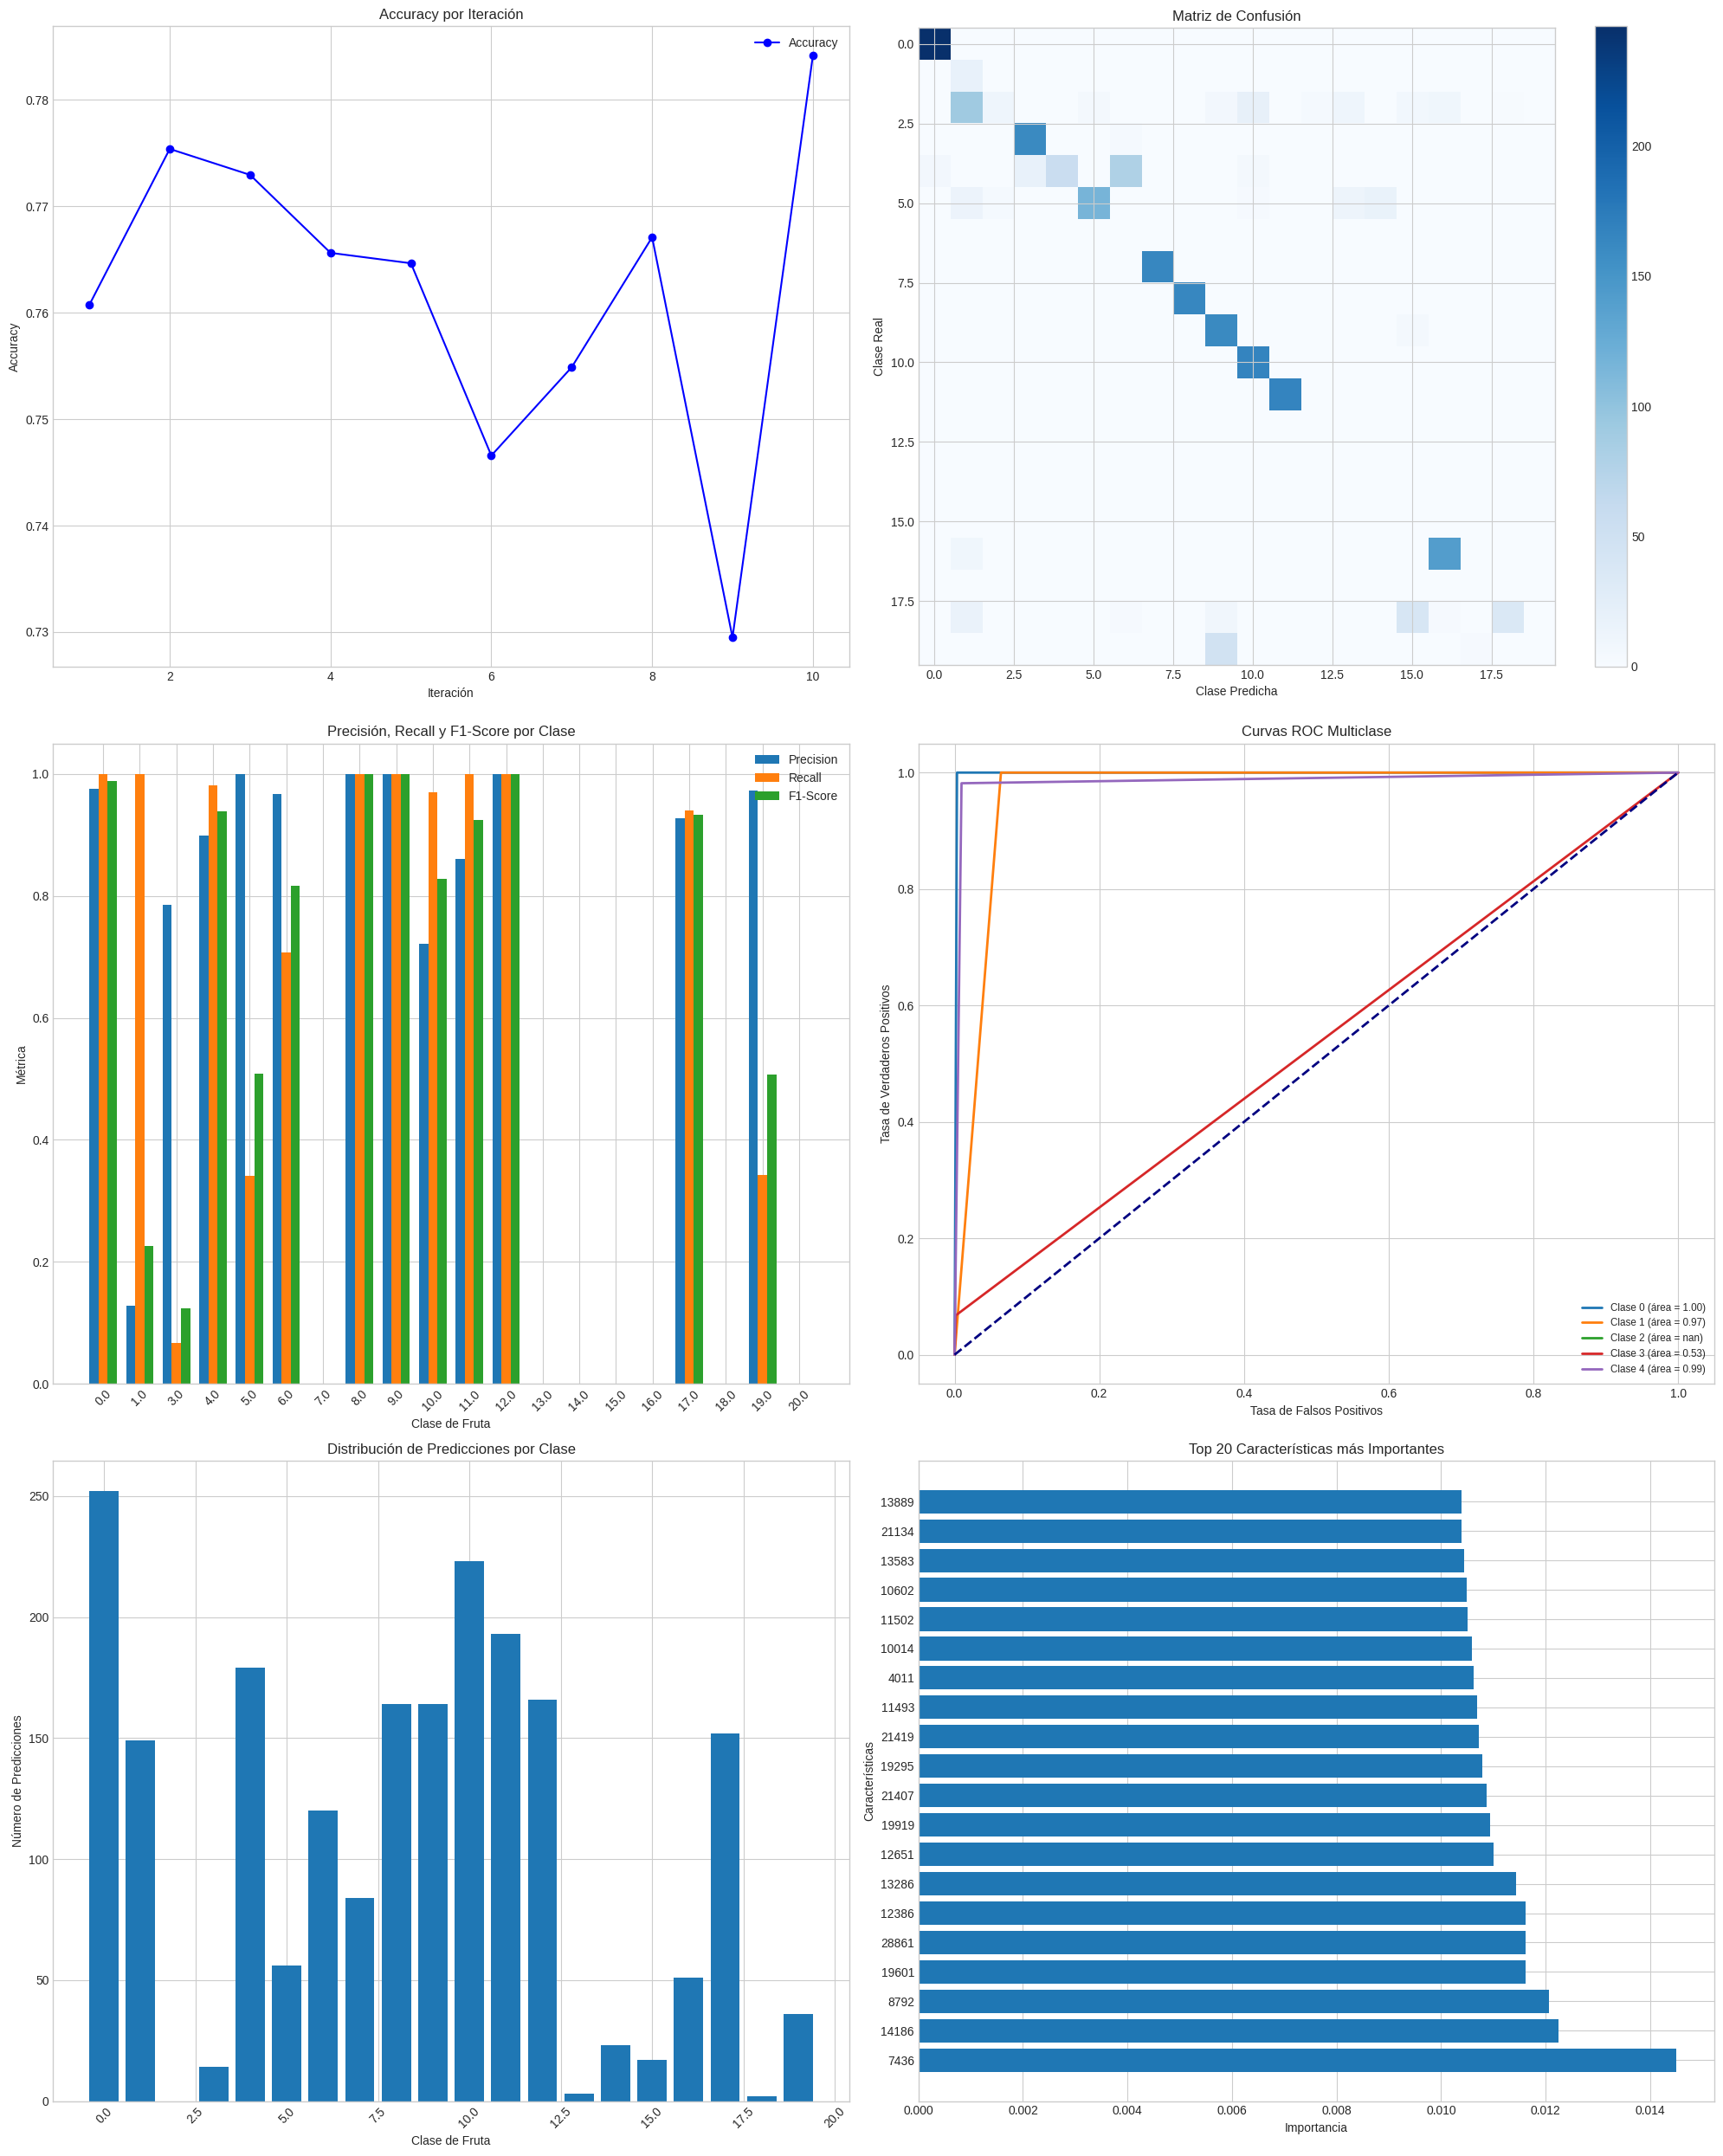


Métricas detalladas por clase:
              precision    recall  f1-score     support
0.0            0.976190  1.000000  0.987952   246.00000
1.0            0.127517  1.000000  0.226190    19.00000
3.0            0.785714  0.067485  0.124294   163.00000
4.0            0.899441  0.981707  0.938776   164.00000
5.0            1.000000  0.341463  0.509091   164.00000
6.0            0.966667  0.707317  0.816901   164.00000
7.0            0.000000  0.000000  0.000000     0.00000
8.0            1.000000  1.000000  1.000000   164.00000
9.0            1.000000  1.000000  1.000000   164.00000
10.0           0.721973  0.969880  0.827763   166.00000
11.0           0.860104  1.000000  0.924791   166.00000
12.0           1.000000  1.000000  1.000000   166.00000
13.0           0.000000  0.000000  0.000000     0.00000
14.0           0.000000  0.000000  0.000000     0.00000
15.0           0.000000  0.000000  0.000000     0.00000
16.0           0.000000  0.000000  0.000000     0.00000
17.0           0

In [ ]:
# Evaluar y visualizar los resultados del mejor modelo
report_df = evaluate_and_visualize_model(best_predictions, best_model, accuracies)

# Evaluación del Modelo y Análisis de Resultados


1. **Tabla de Precisión por Iteración**:
   - La tabla muestra la precisión en cada una de las 10 iteraciones de entrenamiento, con valores que oscilan entre aproximadamente 0.72 y 0.78.
   - Hay fluctuaciones en la precisión a lo largo de las iteraciones, lo que podría indicar cierta inestabilidad en el modelo o en el proceso de optimización.
   - Aunque la precisión comienza en 0.76 y sube en algunos puntos (máxima en 0.78 en la iteración 10), también muestra caídas, como en las iteraciones 6 y 9.
   - Esta variabilidad sugiere que el modelo podría estar oscilando alrededor de una precisión estable sin mejorar significativamente. Esto podría deberse a un número insuficiente de épocas, un tamaño de lote grande o pequeño, o a la necesidad de ajustar otros hiperparámetros.

2. **Interpretación de las Gráficas**:
    - Matriz de confusión:
    La matriz de confusión visualiza el desempeño del modelo en la clasificación de cada clase específica.
    Las filas representan las clases reales y las columnas las clases predichas.
    Las celdas más oscuras en la diagonal indican un alto número de predicciones correctas para esas clases específicas.
    Las celdas fuera de la diagonal muestran los errores de clasificación, donde el modelo predijo incorrectamente una clase diferente a la real.
    La presencia de varias celdas oscuras en la diagonal sugiere que el modelo tiene un buen rendimiento general, aunque también hay algunos errores de clasificación que deben ser considerados.
    - Recall, precisión y f1-score:
    Se puede observar que algunas clases tienen métricas muy altas (cercanas a 1.0) mientras que otras tienen métricas más bajas, indicando variabilidad en el rendimiento del modelo para diferentes clases. Esto puede sugerir que el modelo está funcionando bien para algunas clases, pero necesita mejoras para otras.
    - Curva ROC:
    La curva ROC para la Clase 0 es perfecta (AUC = 1.00), mientras que la Clase 3 tiene un rendimiento bajo (AUC = 0.53). La Clase 2 no tiene un AUC disponible. Estas curvas son útiles para evaluar cómo de bien el modelo puede distinguir entre las clases. Un AUC más alto indica un mejor rendimiento.

# Script para visualizar datos en Tableau

Este script realiza la extracción de datos visuales y características de un conjunto de imágenes de frutas descargado de Kaggle, con el objetivo de preparar los datos para una futura visualización en Tableau. A continuación, se describen los pasos realizados:

### 1. **Configuración Inicial**

   - **Importación de Bibliotecas**: Se importan las bibliotecas necesarias, como `os`, `json`, `zipfile`, `numpy`, `pandas`, y `PIL.Image`. Estas se utilizan para gestionar archivos, procesar imágenes, y manejar datos tabulares.
   - **Creación del Directorio de Kaggle y Configuración de Credenciales**:
     - Se crea un directorio en el sistema de archivos (`/root/.kaggle`) para almacenar las credenciales de Kaggle.
     - A continuación, se define un diccionario con el nombre de usuario y clave de Kaggle, que se guarda en el archivo `kaggle.json` dentro del directorio recién creado.
     - Los permisos del archivo `kaggle.json` se configuran para restringir el acceso, garantizando que el archivo solo pueda ser leído y escrito por el propietario, mejorando así la seguridad de las credenciales.

### 2. **Descarga y Descompresión del Dataset**

   - Mediante el comando `kaggle datasets download`, el script descarga el conjunto de datos **"fruits"** desde Kaggle, y se descomprime automáticamente en el directorio `/content/fruits`.
   - Este conjunto de datos contiene imágenes de diferentes frutas organizadas en carpetas según la clase de cada fruta.

### 3. **Extracción de Características de las Imágenes**

   - **Inicialización de Variables**: Se inicializa una lista `data` que almacenará las características de cada imagen.
   - **Recorrido de Archivos de Imagen**:
     - El script recorre las subcarpetas y archivos de imagen dentro del directorio de imágenes descargadas.
     - Para cada archivo de imagen, se verifica su formato (debe ser `.png`, `.jpg` o `.jpeg`).
     - La imagen se abre y se redimensiona a un tamaño fijo de `100x100` píxeles para asegurar consistencia en la extracción de características.
     - **Cálculo de Color Promedio**: Se convierte la imagen a un array de `NumPy` y se calcula el color promedio RGB, lo cual da una representación general del color dominante de la imagen.
     - **Obtención de la Clase de Fruta**: La clase de fruta se extrae desde el nombre de la carpeta que contiene la imagen.
     - Finalmente, se almacenan estos valores, junto con el ancho y la altura de la imagen, en la lista `data` como un diccionario.

### 4. **Creación del DataFrame y Exportación a CSV**

   - Los datos recopilados se convierten en un DataFrame de `pandas`, estructurando la información de cada imagen en filas y columnas.
   - El DataFrame se guarda como un archivo CSV (`fruits_image_features.csv`) en el directorio `/content/`, listo para importarse en Tableau para su visualización.
   - **Salida Final**: El script imprime un mensaje indicando que el archivo CSV ha sido generado exitosamente.

### Consideraciones Finales

Este script proporciona una estructura de datos limpia y estandarizada que permite visualizar características clave, como la clase de la fruta y el color promedio, en Tableau. Esta visualización podría facilitar análisis de distribución de colores y comparación entre diferentes tipos de frutas.


In [ ]:
# Configuración inicial
import os
import json
import zipfile
import numpy as np
import pandas as pd
from PIL import Image

# Crear el directorio de Kaggle y añadir credenciales
os.makedirs('/root/.kaggle', exist_ok=True)

kaggle_token = {
    "username": "charlesvelaa",
    "key": "69fb883177f4dfa40f27dbda22bd28d5"
}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_token, file)

# Cambiar permisos de las credenciales de Kaggle
!chmod 600 /root/.kaggle/kaggle.json

# Descargar el dataset de Kaggle y descomprimirlo
!kaggle datasets download moltean/fruits -p /content/fruits --unzip

# Extraer características de las imágenes
data = []
image_folder = '/content/fruits/'

for root, dirs, files in os.walk(image_folder):
    for img_file in files:
        if img_file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, img_file)
            img = Image.open(img_path)
            img = img.resize((100, 100))

            # Convertir la imagen a un array NumPy y calcular el color promedio
            img_array = np.array(img)
            avg_color = img_array.mean(axis=(0, 1))  # Promedio RGB

            # Obtener la clase de fruta desde el nombre de la carpeta
            fruit_class = os.path.basename(root)

            # Agregar información al dataset
            data.append({
                "filename": img_file,
                "fruit_class": fruit_class,
                "avg_red": avg_color[0],
                "avg_green": avg_color[1],
                "avg_blue": avg_color[2],
                "width": img.width,
                "height": img.height
            })

# Crear un DataFrame y guardarlo como CSV
df = pd.DataFrame(data)
df.to_csv('/content/fruits_image_features.csv', index=False)

print("Archivo CSV generado: fruits_image_features.csv")


# Visualización de las características del dataset

### 1. Conteo de Frutas

Esta gráfica muestra el número de imágenes por clase de fruta en el dataset. Observamos que la clase de fruta más representada es "Grape Blue 1" con 1,312 imágenes, seguida por "Cherry 2" con 1,204 imágenes. Las clases restantes tienen un número de imágenes que varía, indicando una posible falta de balance en la cantidad de muestras por clase. Esto puede afectar el rendimiento de los modelos de clasificación, ya que algunas clases están subrepresentadas.

### 2. Histograma de píxeles azules

Este histograma representa la distribución de los valores promedio de la intensidad de los píxeles en el canal azul para todas las imágenes del dataset. La mayoría de los valores de promedio de azul están entre 80 y 160, con un pico alrededor de 120. Esto indica que, en promedio, las imágenes tienden a tener una moderada presencia de azul, sin intensidades extremadamente altas o bajas. Esta información puede ser útil para entender la composición de color en el dataset y cómo influye en la clasificación de frutas.

### 3. Histograma de píxeles verdes

En este histograma se observa la distribución de los valores promedio de la intensidad de los píxeles en el canal verde. La mayor concentración de valores promedio de verde se encuentra entre 100 y 180, alcanzando un máximo alrededor de 140-150. Esta tendencia sugiere que el verde es otro color prominente en el dataset de imágenes de frutas, lo cual es esperado dado que muchas frutas tienen tonalidades verdes. Conocer esta distribución ayuda a identificar si el verde es un factor discriminante para clasificar ciertas clases de frutas.

### 4. Histograma de píxeles rojos
Este histograma muestra la distribución de los valores promedio de la intensidad de los píxeles en el canal rojo para todas las imágenes del dataset. La mayoría de los valores promedio de rojo se encuentran entre 140 y 200, con un pico alrededor de 160. Esto sugiere que el rojo es un color prominente en el dataset de imágenes de frutas, lo cual es relevante ya que muchas frutas tienen tonalidades rojas. Conocer esta distribución es útil para entender cómo el color rojo puede influir en la clasificación de las frutas y si es un factor discriminante importante.

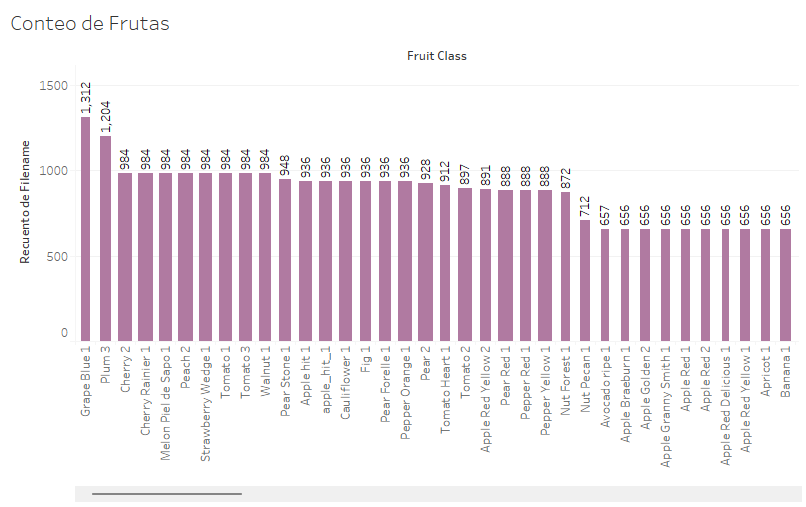

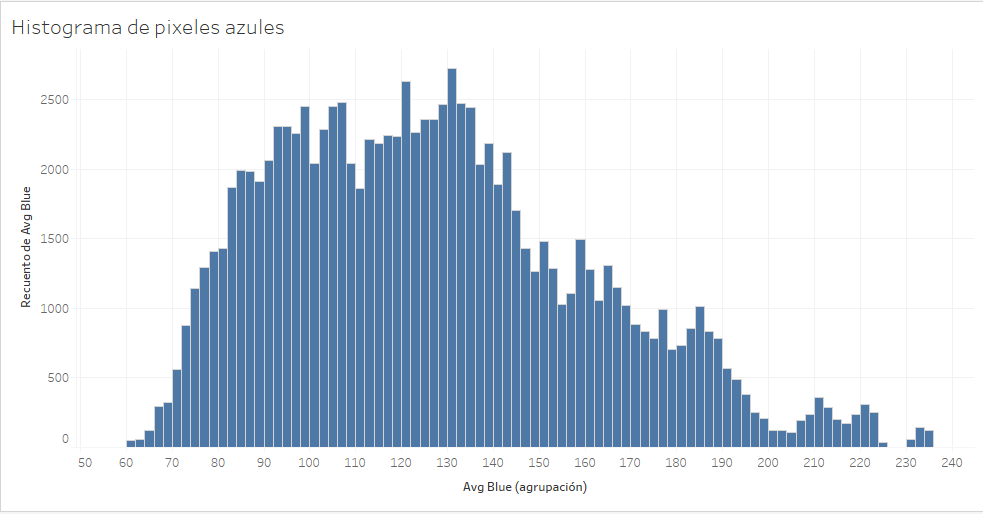

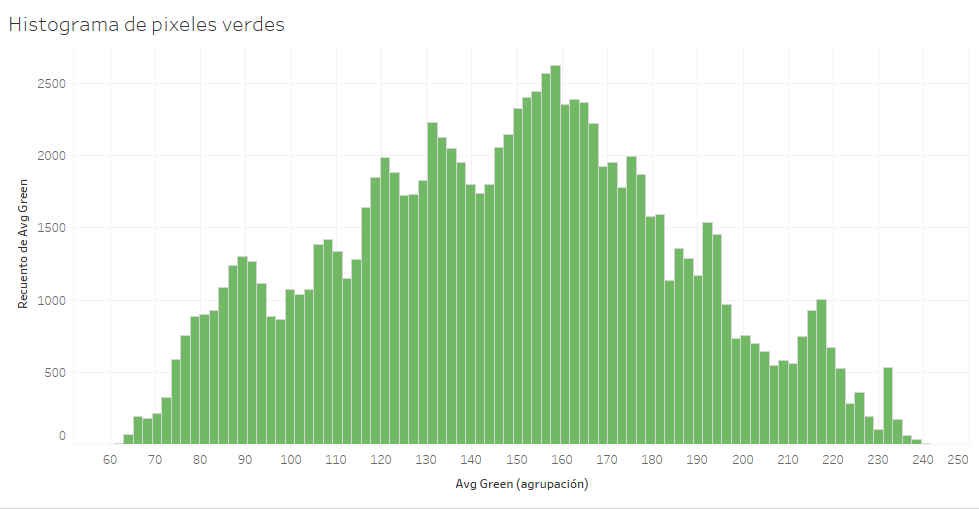

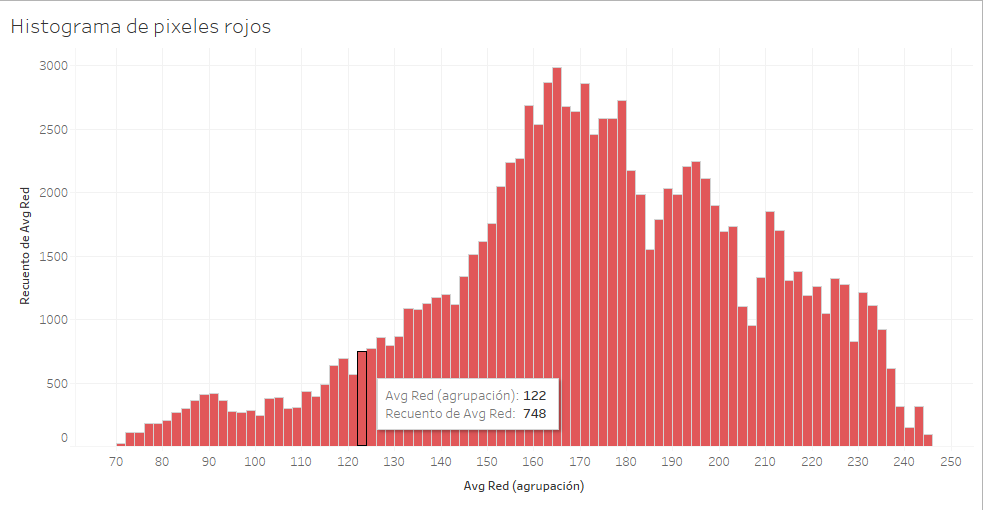